# Dragon Real Estate - Price Predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing.value_counts()

CRIM      ZN    INDUS  CHAS  NOX    RM     AGE    DIS     RAD  TAX  PTRATIO  B       LSTAT  MEDV
0.00632   18.0  2.31   0     0.538  6.575  65.2   4.0900  1    296  15.3     396.90  4.98   24.0    1
1.13081   0.0   8.14   0     0.538  5.713  94.1   4.2330  4    307  21.0     360.17  22.60  12.7    1
1.46336   0.0   19.58  0     0.605  7.489  90.8   1.9709  5    403  14.7     374.43  1.73   50.0    1
1.42502   0.0   19.58  0     0.871  6.510  100.0  1.7659  5    403  14.7     364.31  7.39   23.3    1
1.41385   0.0   19.58  1     0.871  6.129  96.0   1.7494  5    403  14.7     321.02  15.12  17.0    1
                                                                                                   ..
0.11069   0.0   13.89  1     0.550  5.951  93.8   2.8893  5    276  16.4     396.90  17.92  21.5    1
0.11027   25.0  5.13   0     0.453  6.456  67.8   7.2255  8    284  19.7     396.90  6.73   22.2    1
0.10959   0.0   11.93  0     0.573  6.794  89.3   2.3889  1    273  21.0     393.45  6.

In [6]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [7]:
housing['TAX'].value_counts()

666    132
307     40
403     30
437     15
304     14
      ... 
313      1
226      1
280      1
241      1
469      1
Name: TAX, Length: 66, dtype: int64

In [8]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.285681,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.704504,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
%matplotlib inline

In [10]:
import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

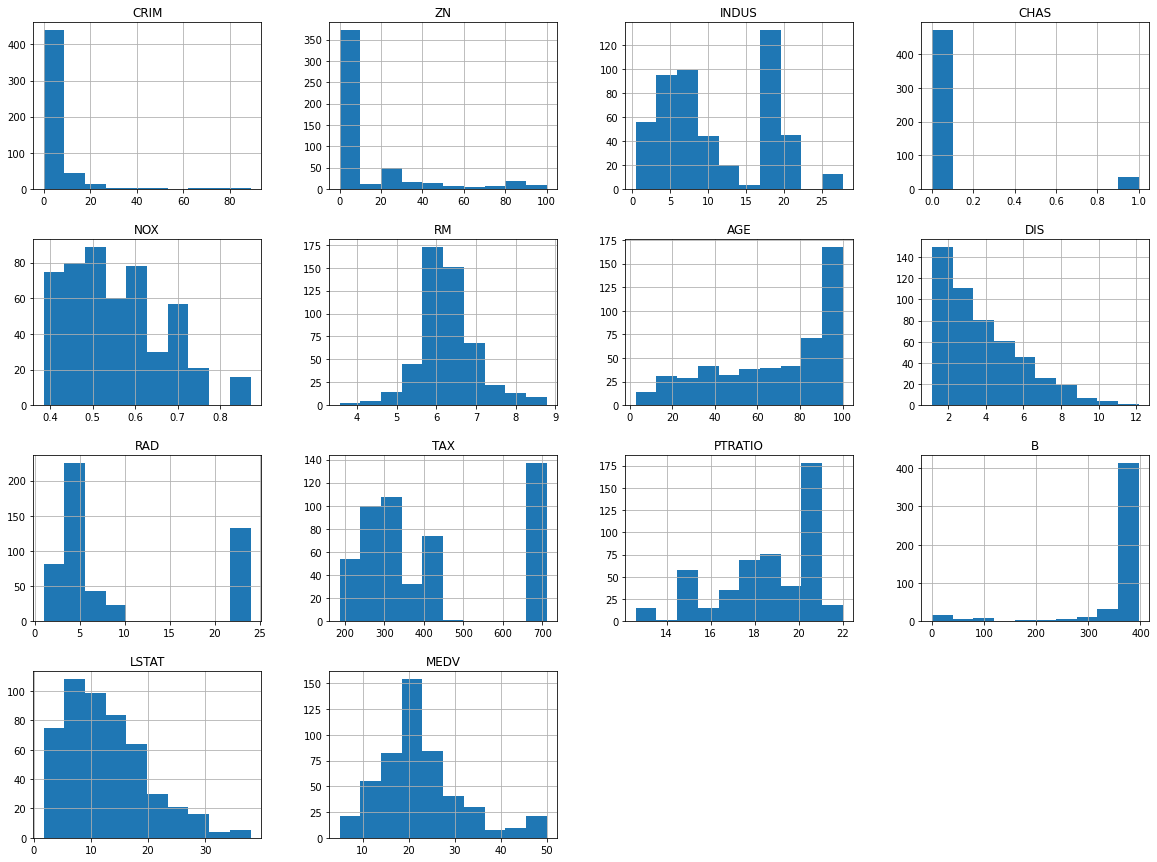

In [11]:
housing.hist(bins = 10, figsize = (20, 15))

## TRAIN-TEST SPLITTING ##

In [12]:
import numpy as np
def train_test_split(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [13]:
train_set, test_set = train_test_split(housing, 0.2)

[173 274 491  72 452  76 316 140 471 500 218   9 414  78 323 473 124 388
 195 448 271 278  30 501 421 474  79 454 210 497 172 320 375 362 467 153
   2 336 208  73 496 307 204  68  90 390  33  70 470   0  11 281  22 101
 268 485 442 290  84 245  63  55 229  18 351 209 395  82  39 456  46 481
 444 355  77 398 104 203 381 489  69 408 255 392 312 234 460 324  93 137
 176 417 131 346 365 132 371 412 436 411  86  75 477  15 332 423  19 325
 335  56 437 409 334 181 227 434 180  25 493 238 244 250 418 117  42 322
 347 182 155 280 126 329  31 113 148 432 338  57 194  24  17 298  66 211
 404  94 154 441  23 225 433 447   5 116  45  16 468 360   3 405 185  60
 110 321 265  29 262 478  26   7 492 108  37 157 472 118 114 175 192 272
 144 373 383 356 277 220 450 141 369  67 361 168 499 394 400 193 249 109
 420 145  92 152 222 304  83 248 165 163 199 231  74 311 455 253 119 284
 302 483 357 403 228 261 237 386 476  36 196 139 368 247 287 378  59 111
  89 266   6 364 503 341 158 150 177 397 184 318  1

In [14]:
len(train_set)

405

In [15]:
len(test_set)

101

In [16]:
test_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296,16.6,395.50,9.04,23.6
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254,17.6,396.90,3.53,32.4
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.07,13.6
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305,19.2,390.91,5.52,22.8
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666,20.2,385.09,17.27,16.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,9.23230,0.0,18.10,0,0.631,6.216,100.0,1.1691,24,666,20.2,366.15,9.53,50.0
412,18.81100,0.0,18.10,0,0.597,4.628,100.0,1.5539,24,666,20.2,28.79,34.37,17.9
436,14.42080,0.0,18.10,0,0.740,6.461,93.3,2.0026,24,666,20.2,27.49,18.05,9.6
411,14.05070,0.0,18.10,0,0.597,6.657,100.0,1.5275,24,666,20.2,35.05,21.22,17.2


In [17]:
train_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
75,0.09512,0.0,12.83,0,0.4370,6.286,45.0,4.5026,5,398,18.7,383.23,8.94,21.4
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666,20.2,349.48,24.91,12.0
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307,21.0,395.62,8.47,19.9
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304,16.9,362.25,7.83,19.4
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.5200,5.836,91.9,2.2110,5,384,20.9,395.67,18.66,19.5
270,0.29916,20.0,6.96,0,0.4640,5.856,42.1,4.4290,3,223,18.6,388.65,13.00,21.1
348,0.01501,80.0,2.01,0,0.4350,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
435,11.16040,0.0,18.10,0,0.7400,6.629,94.6,2.1247,24,666,20.2,109.85,23.27,13.4


In [18]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state = 42)
print(f"Rows in train_set = {len(train_set)}\nRows in test_set = {len(test_set)}")

Rows in train_set = 404
Rows in test_set = 102


In [19]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [21]:
housing = strat_train_set.copy()

In [22]:
strat_test_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
202,0.02177,82.5,2.03,0,0.4150,7.610,15.7,6.2700,2,348,14.7,395.38,3.11,42.3
61,0.17171,25.0,5.13,0,0.4530,5.966,93.4,6.8185,8,284,19.7,378.08,14.44,16.0
278,0.07978,40.0,6.41,0,0.4470,6.482,32.1,4.1403,4,254,17.6,396.90,7.19,29.1
171,2.31390,0.0,19.58,0,0.6050,5.880,97.3,2.3887,5,403,14.7,348.13,12.03,19.1
357,3.84970,0.0,18.10,1,0.7700,6.395,91.0,2.5052,24,666,20.2,391.34,13.27,21.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,0.11425,0.0,13.89,1,0.5500,6.373,92.4,3.3633,5,276,16.4,393.74,10.50,23.0
320,0.16760,0.0,7.38,0,0.4930,6.426,52.3,4.5404,5,287,19.6,396.90,7.20,23.8
9,0.17004,12.5,7.87,0,0.5240,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9
204,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,390.55,2.88,50.0


In [23]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [24]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [25]:
train_ratio = 376/28
train_ratio

13.428571428571429

In [26]:
test_ratio = 95/7
test_ratio

13.571428571428571

In [27]:
test_ratio/train_ratio

1.0106382978723405

## Correlation ##

In [28]:
corr_matrix = housing.corr()

In [29]:
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.689354
ZN         0.345162
B          0.335772
DIS        0.245794
CHAS       0.154175
AGE       -0.358729
RAD       -0.386831
CRIM      -0.393238
NOX       -0.418736
TAX       -0.481958
INDUS     -0.507258
PTRATIO   -0.517195
LSTAT     -0.740104
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

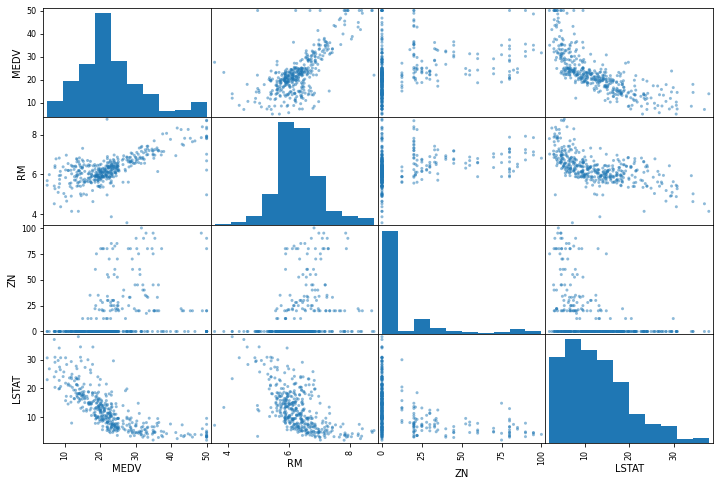

In [30]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM", "ZN", "LSTAT"]
scatter_matrix(housing[attributes], figsize = (12, 8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

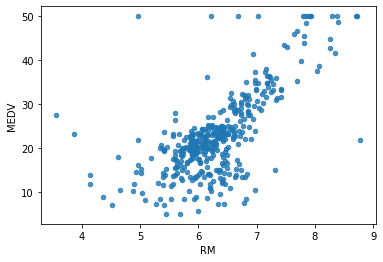

In [31]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha = 0.8)

## New attributes using given attributes

In [32]:
housing["TaxRM"] = housing["TAX"]/housing["RM"]

In [33]:

housing["TaxRM"]

89      38.140980
183     29.407283
191     59.059208
443    102.698535
92      41.912450
          ...    
351     62.471500
353     27.794293
150     65.828161
430    104.914934
369     99.655843
Name: TaxRM, Length: 404, dtype: float64

In [34]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TaxRM
89,0.05302,0.0,3.41,0,0.489,7.079,63.1,3.4145,2,270,17.8,396.06,5.70,28.7,38.140980
183,0.10008,0.0,2.46,0,0.488,6.563,95.6,2.8470,3,193,17.8,396.90,5.68,32.5,29.407283
191,0.06911,45.0,3.44,0,0.437,6.739,30.8,6.4798,5,398,15.2,389.71,4.69,30.5,59.059208
443,9.96654,0.0,18.10,0,0.740,6.485,100.0,1.9784,24,666,20.2,386.73,18.85,15.4,102.698535
92,0.04203,28.0,15.04,0,0.464,6.442,53.6,3.6659,4,270,18.2,395.01,8.16,22.9,41.912450


In [35]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.689354
ZN         0.345162
B          0.335772
DIS        0.245794
CHAS       0.154175
AGE       -0.358729
RAD       -0.386831
CRIM      -0.393238
NOX       -0.418736
TAX       -0.481958
INDUS     -0.507258
PTRATIO   -0.517195
TaxRM     -0.546346
LSTAT     -0.740104
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TaxRM', ylabel='MEDV'>

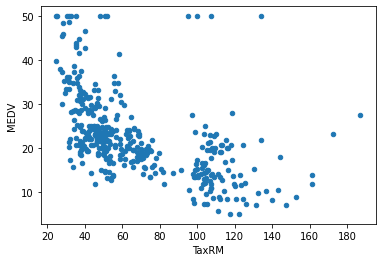

In [36]:
from pandas.plotting import scatter_matrix
housing.plot(kind="scatter", x="TaxRM", y = "MEDV")

In [37]:
housing = strat_train_set.drop("MEDV", axis = 1)
housing_labels = strat_train_set["MEDV"].copy()

## Missing Attributes

In [38]:
# To deal with missing attributes, three options are there -
# 1. Get rid of missing data points
# 2. Get rid of attribute having missing data points
# 3. Set the missing data point value to some value(0, median, mean)

In [39]:
#Option 1
a = housing.dropna(subset = ["RM"])
a.shape

(400, 13)

In [40]:
housing.shape

(404, 13)

In [41]:
#Option 2
b = housing.drop("RM", axis = 1)

In [42]:
b.shape

(404, 12)

In [43]:
housing.shape

(404, 13)

In [44]:
#Option 3
median = housing["RM"].median()

In [45]:
c = housing["RM"].fillna(median)

In [46]:
c.shape

(404,)

In [47]:
c.describe()

count    404.000000
mean       6.299240
std        0.730223
min        3.561000
25%        5.886500
50%        6.229500
75%        6.655500
max        8.780000
Name: RM, dtype: float64

In [48]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [49]:
imputer.statistics_

array([2.61390e-01, 0.00000e+00, 8.56000e+00, 0.00000e+00, 5.35000e-01,
       6.22950e+00, 7.68000e+01, 3.16750e+00, 5.00000e+00, 3.29000e+02,
       1.87000e+01, 3.91605e+02, 1.11700e+01])

In [78]:
X = imputer.transform(housing)
X.shape

(404, 13)

In [51]:
housing_tr = pd.DataFrame(X, columns = housing.columns)

In [52]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    float64
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    float64
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB


In [53]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.616320,11.860149,10.963540,0.069307,0.552677,6.299240,68.077475,3.783533,9.418317,404.655941,18.375495,356.220495,12.567797
std,8.883261,23.607489,6.849207,0.254290,0.115315,0.730223,28.557010,2.112777,8.654422,168.516025,2.216321,91.989648,7.232315
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,6.000000,1.137000,1.000000,187.000000,12.600000,0.320000,1.920000
25%,0.078832,0.000000,4.950000,0.000000,0.448750,5.886500,42.275000,2.077100,4.000000,277.000000,16.900000,374.335000,6.710000
50%,0.261390,0.000000,8.560000,0.000000,0.535000,6.229500,76.800000,3.167500,5.000000,329.000000,18.700000,391.605000,11.170000
75%,3.359357,20.000000,18.100000,0.000000,0.624000,6.655500,94.325000,5.218725,24.000000,666.000000,20.200000,395.810000,16.977500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## Scikit-Learn Design

Mainly, three types of objects are there -
1. Estimators
2. Transformers
3. Predictors

## Feature scaling

1. Min-Max scaling
    (value-min)/(max-min) --> 0 to 1
    Sklearn provides a class called MinMaxScaler for this

2. Standardized scaling
    (value - mean)/std
    Sklearn provides a class named StandardScaler for this

## Creating Pipeline

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy = "median")),
    # we can add more
    ("std_scaler", StandardScaler()),
])

In [55]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [56]:
housing_num_tr.shape

(404, 13)

In [57]:
housing_num_tr.shape

(404, 13)

## Selecting a desired model

In [58]:
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
#model = LinearRegression() #Predictor
#model = DecisionTreeRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [59]:
some_data = housing.iloc[:5]

In [60]:
some_labels = housing_labels.iloc[:5]

In [61]:
prepared_data = my_pipeline.transform(some_data)

In [62]:
model.predict(prepared_data)

array([31.31 , 31.305, 30.118, 15.427, 23.016])

In [63]:
list(some_labels)

[28.7, 32.5, 30.5, 15.4, 22.9]

## Evaluating Model

In [64]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [65]:
rmse #for DecisionTreeRegressor rmse = 0 which means overfitting

1.348475940232578

## Using better evaluation technique - K-folds Cross Validation

In [66]:
# k = 10
# 1 2 3 4 5 6 7 8 9 10 --> divide data into 10 groups
# 1. remove 1 and train rest of data groups and then test on 1
# 2. remove 2 and train rest of data groups and then test on 2
#     .
#     .
#     .
# 10. remove 10 and train rest of data groups and then test on 10

In [67]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
rmse_scores = np.sqrt(-scores)

In [68]:
rmse_scores

array([3.21142414, 4.64846896, 4.32366786, 3.07423613, 2.57535141,
       3.6051952 , 3.0094877 , 5.35375635, 2.62312891, 3.21127748])

In [69]:
def print_scores(scores) :
    print(f"Scores: {scores} ")
    print(f"Mean: {scores.mean()} ")
    print(f"Standard Deviation : {scores.std()} ")

In [70]:
print_scores(rmse_scores)

Scores: [3.21142414 4.64846896 4.32366786 3.07423613 2.57535141 3.6051952
 3.0094877  5.35375635 2.62312891 3.21127748] 
Mean: 3.5635994123673753 
Standard Deviation : 0.8727445962995238 


## Saving the model RandomForestRegressor

In [71]:
from joblib import dump, load
dump(model, 'Dragon.joblib')

['Dragon.joblib']

## Testing the model

In [72]:
x_test = strat_test_set.drop("MEDV", axis = 1)
y_test = strat_test_set["MEDV"].copy()
x_test_prepared = my_pipeline.transform(x_test)
final_predictions = model.predict(x_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(f"{final_predictions} \n {list(y_test)}")

[44.067 18.979 24.698 21.641 21.034 21.976  8.361 27.495 23.74   8.596
 11.435 12.857 16.68  19.152 20.261 20.593 24.487 24.117 16.004 12.521
 19.227 23.867 34.761 43.813 28.513 19.175  9.859 40.621 24.795 13.513
 20.572 21.037 24.87  31.261 22.417 20.248 10.056 16.329 35.107 14.931
 14.158 24.164 16.629 21.999 16.595 13.973 16.505 29.823 19.743 14.848
 31.687 33.403 19.883 20.515 20.668 24.659 20.016 10.327 15.381 22.222
 20.096 20.308 25.47  20.045 45.287  9.525 19.863 17.062 26.439 18.791
 20.535 20.832 39.631 31.805 23.403 27.335 20.351 23.463 19.273 15.279
 28.825 23.348 21.236 15.241 20.706 20.636 21.344  9.43  24.414 25.036
 22.538 20.289 21.561 19.056 20.512 14.648 13.288 22.687 24.119 20.136
 47.758 20.725] 
 [42.3, 16.0, 29.1, 19.1, 21.7, 21.4, 10.4, 24.5, 22.6, 7.4, 12.8, 9.6, 18.4, 18.2, 19.4, 21.7, 16.5, 23.1, 17.4, 13.8, 20.5, 24.5, 36.2, 50.0, 26.7, 18.8, 10.5, 44.0, 15.0, 15.6, 20.1, 22.4, 23.8, 37.0, 23.9, 18.3, 10.8, 18.1, 33.2, 13.8, 13.1, 22.2, 16.1, 20.4, 15.2, 13.

In [73]:
final_rmse

2.9143810966430896

In [74]:
print(prepared_data[0])

[-0.40162256 -0.50301218 -1.10420166 -0.27288841 -0.55288505  1.06916257
 -0.17451572 -0.17488404 -0.85823352 -0.80005984 -0.2599843   0.43362383
 -0.95077619]


In [75]:
print(some_labels.iloc[0])

28.7
